In [184]:
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("../")
import matplotlib.pyplot as plt
from data import transforms
from PIL import Image
import torch
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [185]:
img_size=640
interpolation='bilinear'

In [186]:
fill_color = transforms.resolve_fill_color("mean", transforms.IMAGENET_DEFAULT_MEAN)


In [187]:
image_tfl = [
    #transforms.RandomRotation(rotation=90),
    transforms.ColorTransform(brightness=(0.8,1.5), contrast=(0.8, 1.2), hue=(-0.1, 0.1)),
    transforms.RandomFlip(horizontal=True, prob=0.5),
    transforms.RandomResizePad(target_size=img_size, interpolation=interpolation, scale=(0.5,3.), fill_color=fill_color, repeat=10),
    transforms.ImageToNumpy()
]

In [188]:
image_tf = transforms.Compose(image_tfl)

In [189]:
image_name = "./test_imgs/aug_test.png"


In [190]:
im = Image.open(image_name).convert('RGB')

In [191]:
im.size

(1920, 1080)

In [192]:
np_img = np.array(im, dtype=np.uint8)
np_img = np.moveaxis(np_img, 2, 0)
#torch_img = torch.from_numpy(np_img).to(dtype=torch.float32)


{'bbox': array([[465.31938168, 516.31938168, 486.73215695, 537.73215695]]), 'cls': array([1]), 'img_scale': 0.9340218514576714}
{'bbox': array([[152.42011  , 152.42011  , 158.5169144, 158.5169144]]), 'cls': array([1]), 'img_scale': 3.280407027563093}
{'bbox': array([[213.47705907, 480.73576539, 222.01614143, 489.27484775]]), 'cls': array([1]), 'img_scale': 2.3421720450297925}
{'bbox': array([[248.58134086, 491.0277544 , 258.52459449, 500.97100803]]), 'cls': array([1]), 'img_scale': 2.0114140436993058}
{'bbox': array([[288.69885833, 431.35680332, 300.24681266, 442.90475766]]), 'cls': array([1]), 'img_scale': 1.7319084768531454}
{'bbox': array([[207.78337865,  97.59346023, 229.3347138 , 119.14479537]]), 'cls': array([1]), 'img_scale': 0.9280167499785245}
{'bbox': array([[277.70162822, 127.70162822, 299.16969334, 149.16969334]]), 'cls': array([1]), 'img_scale': 0.9316163277943079}
{'bbox': array([[304.2409828 , 515.07475184, 324.17062211, 535.00439115]]), 'cls': array([1]), 'img_scale': 1

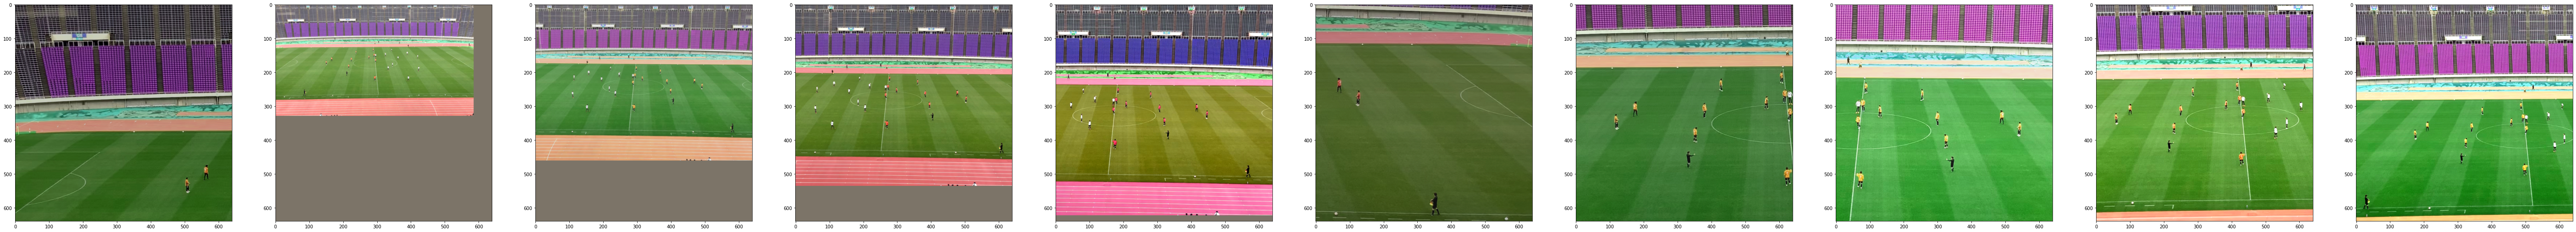

In [193]:
plt.figure(figsize=(100, 200))
for i in range(10):
    aug_img, ann = image_tf(im, {'bbox':np.array([[500,1400,520,1420]]).astype(np.float64), "cls":np.array([1])})
    #aug_img, ann = image_tf(im, {})
    print(ann)
    aug_img = aug_img.transpose((1,2,0))
    plt.subplot(4, 10, i+1)
    plt.imshow(aug_img)
plt.show()